In [3]:
import openai
from openai.types import Completion, CompletionChoice, CompletionUsage
import os
import requests
from dotenv import load_dotenv
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from functools import partial 

load_dotenv("/Users/gabriellelittlefair/Documents/GitHub/MSc Project/DSL/hidden.env")
%reload_ext autoreload
from Setup_Functions import *
from Class_Structures import *
from Region import * 
from Individual import * 
from Pairwise import * 

No region with this name is in the room.
Region not found.
0 (3.0, 3.5, 0.0) None bed 2 2
0 1.9509120587849757e-06 Optimization terminated successfully


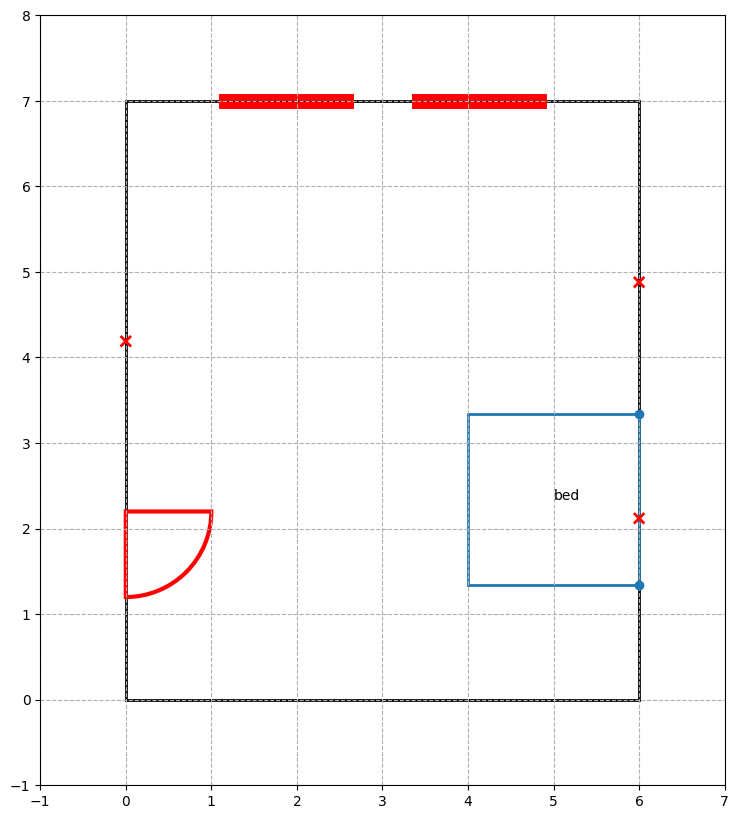

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 1.0009411528546272e-06 Optimization terminated successfully


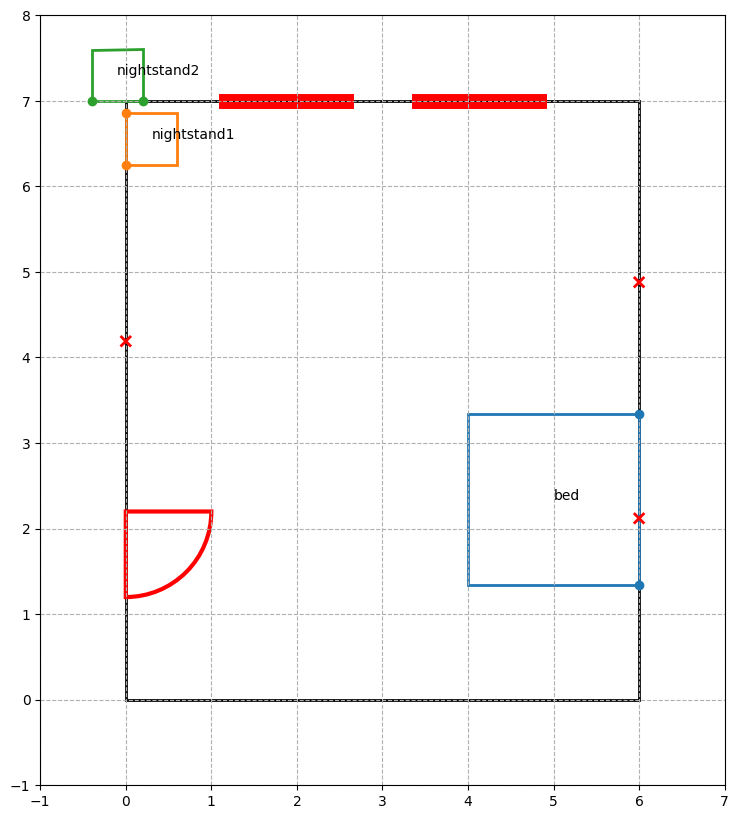

In [6]:
large_bedroom = create_room(6, 7)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
bed = large_bedroom.find("bed")
print(bed.index, bed.position, bed.region, bed.name, bed.length, bed.width)
def optimize_primary_objects(positions, room): 

    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += ind_central(positions, room, 0)

    output += ind_accessible(positions, room, 0, ['front'])  # bed

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

repeats = 15
positions = np.zeros((repeats, 3*(len(large_bedroom.moving_objects) - len(large_bedroom.fm_indices))))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects) - len(large_bedroom.fm_indices)): 
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf
for j in range(repeats):
    res = minimize(optimize_primary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.fm_indices), len(large_bedroom.moving_objects)):
    index = i - len(large_bedroom.fm_indices) 
    large_bedroom.moving_objects[i].position = best_res.x[3*index:3*index + 3] 
large_bedroom.draw() 

large_bedroom.fm_indices += [0]

create_moving_object(large_bedroom, 'nightstand1', 0.6, 0.6, 'dressing', 1)
create_moving_object(large_bedroom, 'nightstand2', 0.6, 0.6, 'dressing', 2)

def optimize_secondary_objects(positions, room): 

    output = 0
    output += ind_next_to_wall(positions, room, 1, 'back')  # nightstand1
    output += ind_next_to_wall(positions, room, 2, 'back')  # nightstand2
    return output

options = {'maxiter': 500, 'ftol': 1e-6}

repeats = 15
positions = np.zeros((repeats, 3*(len(large_bedroom.moving_objects) - len(large_bedroom.fm_indices))))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects) - len(large_bedroom.fm_indices)): 
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf
for j in range(repeats):
    res = minimize(optimize_secondary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.fm_indices), len(large_bedroom.moving_objects)):
    index = i - len(large_bedroom.fm_indices) 
    large_bedroom.moving_objects[i].position = best_res.x[3*index:3*index + 3] 
large_bedroom.draw() 

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 9.281340250779957 Optimization terminated successfully
1 24.33106913157907 Optimization terminated successfully
2 43.74148570833564 Optimization terminated successfully
3 24.24767919743201 Optimization terminated successfully
4 8.303798771563198 Optimization terminated successfully
5 45.81656170104213 Optimization terminated successfully
6 24.253573775262513 Optimization terminated successfully
7 2.457845811420881 Optimization terminated successfully
8 32.17733402612871 Optimization terminated successfully
9 65.94625630592297 Optimization terminated successfully
10 7.678551816688852 Optimization terminated successfully
11 12.321807108745588 Optimization terminated successfully
12 6.509887668297672 Optimization terminated successfully
13 24.051234967573738 Optimization terminated successfully
14 7.8231860169090

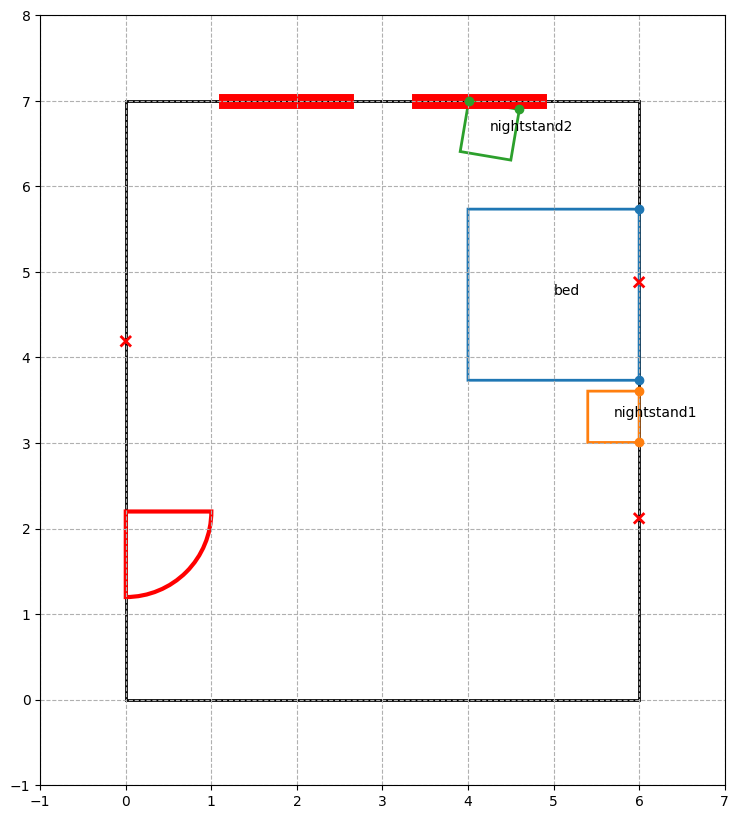

In [7]:
large_bedroom = create_room(6, 7)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'nightstand1', 0.6, 0.6, 'dressing', 0)
create_moving_object(large_bedroom, 'nightstand2', 0.6, 0.6, 'dressing', 1)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_next_to_wall(positions, room, 1, side = 'back')
    output += ind_next_to_wall(positions, room, 2, side = 'back')
    output += p_next_to(positions, room, 0, 1, side1 = 'left', side2 = 'right')
    output += p_next_to(positions, room, 0, 2, side1 = 'right', side2 = 'left')
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += ind_central(positions, room, 0)

    output += ind_accessible(positions, room, 0, ['front'])  # bed
    output += ind_accessible(positions, room, 1, ['front'])  # nightstand1
    output += ind_accessible(positions, room, 2, ['front'])  # nightstand2

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

repeats = 15
positions = np.zeros((repeats, 3*len(large_bedroom.moving_objects)))
for j in range(repeats):
    for i in range(len(large_bedroom.moving_objects)): 
        positions[j, 3*i] = np.random.uniform(0, large_bedroom.width)
        positions[j, 3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[j, 3*i + 2] = np.random.uniform(0, 2*np.pi)

min_fun = np.Inf
for j in range(repeats):
    res = minimize(optimize_primary_objects, positions[j, :], args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(j, res.fun, res.message)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if min_fun < len(large_bedroom.moving_objects)*1e-2:
        break
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 
large_bedroom.draw() 

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 42.94677525675675 Optimization terminated successfully 42.94677525675675
1 17.3098336310931 Optimization terminated successfully 17.3098336310931
2 23.673786331229028 Optimization terminated successfully 23.673786331229028
3 50.124328889436875 Optimization terminated successfully 50.124328889436875
4 18.629885221557476 Optimization terminated successfully 18.629885221557476
5 41.281055751966534 Optimization terminated successfully 41.281055751966534
6 84.21577349651017 Optimization terminated successfully 84.21577349651017
7 33.76272505317994 Optimization terminated successfully 33.76272505317994
8 22.66961081972803 Optimization termina

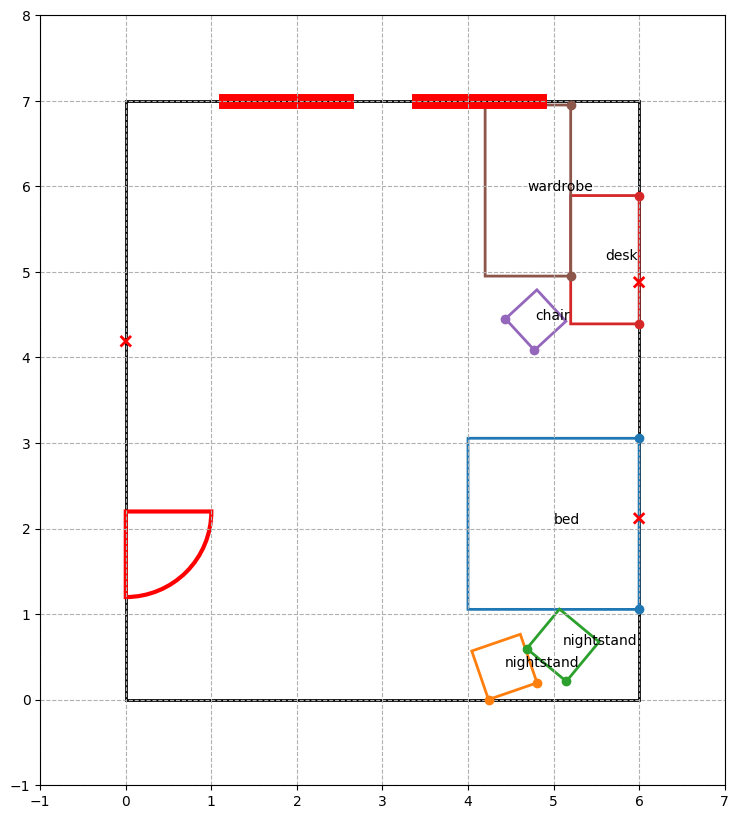

In [4]:
#from Pairwise import * 

large_bedroom = create_room(6, 7)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(large_bedroom, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(large_bedroom, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(large_bedroom, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(large_bedroom, 'bed', 2, 2, 'sleeping', 0)
create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'dressing', 1)
create_moving_object(large_bedroom, 'nightstand', 0.6, 0.6, 'dressing', 2)
create_moving_object(large_bedroom, 'desk', 1.5, 0.8, 'work/study', 3)
create_moving_object(large_bedroom, 'chair', 0.5, 0.5, 'work/study', 4)
create_moving_object(large_bedroom, 'wardrobe', 2, 1, 'storage', 5)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 0, 'back')  # bed
    output += ind_next_to_wall(positions, room, 1, side = 'back')
    output += ind_next_to_wall(positions, room, 2, side = 'back')
    output += p_next_to(positions, room, 0, 1, side1 = 'left', side2 = 'right')
    output += p_next_to(positions, room, 0, 2, side1 = 'right', side2 = 'left')
    output += p_aligned(positions, room, 1, 2, ['bed', 0])
    output += ind_close_to_fixed_object(positions, room, 0, 'socket', side = 'back')
    output += ind_away_from_fixed_object(positions, room, 0, 'window')
    output += ind_away_from_fixed_object(positions, room, 0, 'door')
    output += ind_central(positions, room, 0)

    output += ind_next_to_wall(positions, room, 3, 'back')  # desk
    output += ind_close_to_fixed_object(positions, room, 3, 'socket', side = 'back', max_dist = 2)
    output += ind_close_to_fixed_object(positions, room, 3, 'window', max_dist = 2)
    output += p_away_from(positions, room, 3, 0)
    output += p_next_to(positions, room, 3, 4, side1 = 'front', side2 = 'front')
    output += p_facing(positions, room, 3, 4, both = True)
    output += ind_accessible(positions, room, 4, ['back'])

    output += ind_next_to_wall(positions, room, 5, 'back')  # wardrobe
    output += ind_not_block_fixed_object(positions, room, 5, 'window')
    output += ind_accessible(positions, room, 5, ['front'])

    output += ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(large_bedroom.moving_objects), [large_bedroom.width, large_bedroom.length, 2*np.pi] * len(large_bedroom.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 25
min_fun = np.Inf
iters = 0
while min_fun > 1:
    positions = np.zeros(3*len(large_bedroom.moving_objects))
    for i in range(len(large_bedroom.moving_objects)): 
        positions[3*i] = np.random.uniform(0, large_bedroom.width)
        positions[3*i + 1] = np.random.uniform(0, large_bedroom.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (large_bedroom), method = 'SLSQP', options = options) # constraints = cons
    print(iters, res.fun, res.message, optimize_primary_objects(res.x, large_bedroom))
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    iters += 1
    
for i in range(len(large_bedroom.moving_objects)): 
    large_bedroom.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

large_bedroom.draw() 

In [2]:
def p_perpendicular_aligned(positions, room, object1_index, object2_index, center_object_index = None):
    """ The function p_perpendicular_aligned ensures that two objects are aligned in a room perpendicularly. 
        If center is given, the objects will be aligned about that point. For example, 
        a sofa and chair might be aligned perpendicularly about a coffee table or a side table. Or a chair at the head of the table 
        might be aligned perpendicularly with the chairs closest to it on the sides of the table. 

        
        Args:

        positions: list of floats, x, y, theta values for all objects in the room
        room: rectangular Room object
        object1_index: int, index of object1 in the room
        object2_index: int, index of object2 in the room
        center_object_index: int, index of object in room.moving_objects to be used as the pivot for the alignment (e.g. a coffee table or a table)
    """

    val = 0.0
    obj1, obj2 = room.moving_objects[object1_index], room.moving_objects[object2_index]
    x1, y1, theta1 = positions[3*object1_index:3*object1_index + 3]
    x2, y2, theta2 = positions[3*object2_index:3*object2_index + 3]

    cs1 = np.array(corners(x1, y1, theta1, obj1.width, obj1.length))# TL, TR, BR, BL
    cs2 = np.array(corners(x2, y2, theta2, obj2.width, obj2.length))

    mid_front1 = (cs1[2, :] + cs1[3, :])/2
    mid_front2 = (cs2[2, :] + cs2[3, :])/2

    dir1 = (cs1[3, :] - cs1[0, :])/np.linalg.norm(cs1[3, :] - cs1[0, :])
    dir2 = (cs2[3, :] - cs2[0, :])/np.linalg.norm(cs2[3, :] - cs2[0, :])

    ### Find t1, and t2 (intersection line lengths - want there to be a right angled triangle between each object)
    BA = mid_front2 - mid_front1
    t1 = np.dot(np.array([dir2[1], -dir2[0]]), BA) / np.dot(np.array([dir2[1], -dir2[0]]), dir1)
    t2 = np.dot(np.array([dir1[1], -dir1[0]]), BA) / np.dot(np.array([dir2[1], -dir2[0]]), dir1)
    
    if not center_object_index:
        val += (np.linalg.norm(BA) - np.sqrt((t1**2 + t2**2)))**2 
        val += min(0.0, t1)**2 + min(0.0, t2)**2 # t1 and t2 should be bigger than 0 
        val += min(0.0, np.sqrt((0.8*obj1.width)**2 + (0.8*obj2.width)**2) - np.sqrt(t1**2+ t2**2))**2 # t1 and t2 should not be too big
        val += ((max(theta1, theta2) - min(theta1, theta2)) - np.pi/2)**2 ## thetas should be pi/2 apart
    else: 
        center_obj = room.moving_objects[center_object_index]
        x3, y3, theta3 = positions[3*center_object_index:3*center_object_index + 3]
        val += (np.linalg.norm(BA) - np.sqrt((t1**2 + t2**2)))**2 ## mid_front1, mid_front2, and intersection point should make a right angled triangle 
        val += min(0.0, t1 * t2)**2 # t1 and t2 should either both be positive or both be negative 
        C = np.array([x1, y1]) + t1 * dir1 
        val += (C[0] - x3)**2 + (C[1] - y3)**2 # C should be the center of the center object
        val += min(0.0, np.sqrt((center_obj.width)**2 + (center_obj.width)**2) - np.sqrt(t1**2+ t2**2))**2 # t1 and t2 should not be too big
        val += ((max(theta1, theta2) - min(theta1, theta2)) - np.pi/2)**2 ## thetas should be pi/2 apart
    return val

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 36.78943163381958
10 13.07880555375528
20 3.3259750833312656
30 0.5566830258701834
40 0.5566830258701834
50 0.5566830258701834
60 0.5566830258701834
70 0.5566830258701834
80 0.5566830258701834
90 0.5566830258701834
Max number of iterations reached.
100 0.5566830258701834


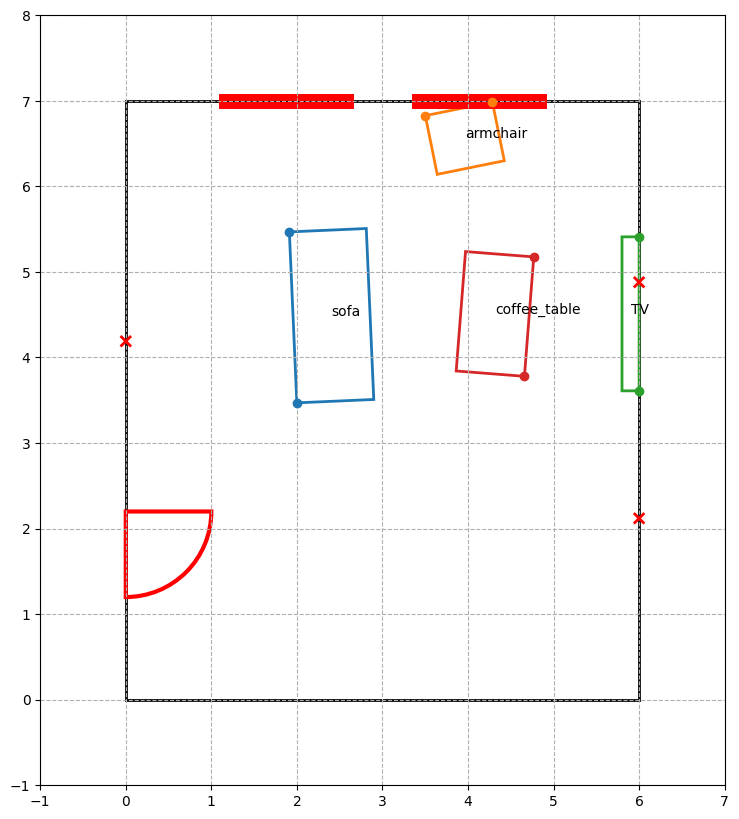

In [10]:
living_room = create_room(6, 7)
create_fixed_object(living_room, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(living_room, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(living_room, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(living_room, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(living_room, 'sofa', 2, 0.9, 'living', 0)
create_moving_object(living_room, 'armchair', 0.8, 0.7, 'living', 1)
create_moving_object(living_room, 'TV', 1.8, 0.2, 'living', 2)
create_moving_object(living_room, 'coffee_table', 1.4, 0.8, 'living', 3)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_next_to_wall(positions, room, 2, 'back')  # TV
    output += ind_central(positions, room, 2)
    output += ind_close_to_fixed_object(positions, room, 2, 'socket', side = 'back')

    output += p_facing(positions, room, 0, 2, both = True)
    output += p_facing(positions, room, 1, 3)
    output += p_facing(positions, room, 0, 3)
    output += p_infront(positions, room, 3, 2)
    output += p_infront(positions, room, 3, 0)
    output += p_perpendicular_aligned(positions, room, 0, 1, center_object_index=3)

    output += ind_accessible(positions, room, 3, ['front', 'left', 'right', 'back'])

    output += 3*ind_aligned(positions, room)
    output += 5*ind_no_overlap(positions, room)
    output += 5*ind_in_bounds(positions, room)

    return output

bounds = Bounds([0] * 3 * len(living_room.moving_objects), [living_room.width, living_room.length, 2*np.pi] * len(living_room.moving_objects))
options = {'maxiter': 500, 'ftol': 1e-6}

max_iters = 100
min_fun = np.Inf
iters = 0
while min_fun > 0.3:
    positions = np.zeros(3*len(living_room.moving_objects))
    for i in range(len(living_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, living_room.width)
        positions[3*i + 1] = np.random.uniform(0, living_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (living_room), method = 'SLSQP', options = options)

    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 
    if iters%10 == 0: 
        print(iters, best_res.fun)
    iters += 1


print(iters, best_res.fun)
for i in range(len(living_room.moving_objects)): 
    living_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

living_room.draw() 

In [41]:
def p_surround(positions, room, central_object_index, object_indices):
    """ The function p_surroudn ensures that central_object is surrounded by all the objects in object_indices.
        This would be used for chairs around a dining table.

        Args:
        positions: list of floats, x, y, theta values for all objects in the room
        room: rectangular Room object
        central_object_index: int, Object object
        object_indices: list of ints, indices of Object objects
    """

    val = 0
    center_x, center_y = positions[3*central_object_index:3*central_object_index + 2]

    pos = np.array(positions).reshape(-1, 3)
    pos = pos[object_indices, :]
    thetas = pos[:, 2] ## all thetas should add up to a multiple of pi
    val += (np.sum(thetas) - np.round(np.sum(thetas)/np.pi)*np.pi)**2

    center_of_mass = np.mean(pos[:, :2], axis = 0)
    val += 2 * ((center_of_mass[0] - center_x)**2 + (center_of_mass[1] - center_y)**2)# center of mass of all the objects
    all_objects_distances_to_sides = []
    for i in range(len(object_indices)):
        #val += p_facing(positions, room, object_indices[i], central_object_index)
        val += p_next_to(positions, room, object_indices[i], central_object_index, side1 = 'front')
        distances_to_sides = [p_next_to(positions, room, object_indices[i], central_object_index, side1 = 'front', side2 = j) for j in ['front', 'back', 'left', 'right']]
        all_objects_distances_to_sides += [min(distances_to_sides)]
    


    all_objects_distances_to_sides = np.array(all_objects_distances_to_sides)
    average_distance = np.mean(all_objects_distances_to_sides)
    for j in range(len(object_indices)):
        val += np.sum((all_objects_distances_to_sides[j] - average_distance)**2)

    return val


No region with this name is in the room.
Region not found.
0 0.0008874204810539403
1 0.0008874204810539403 Optimization terminated successfully


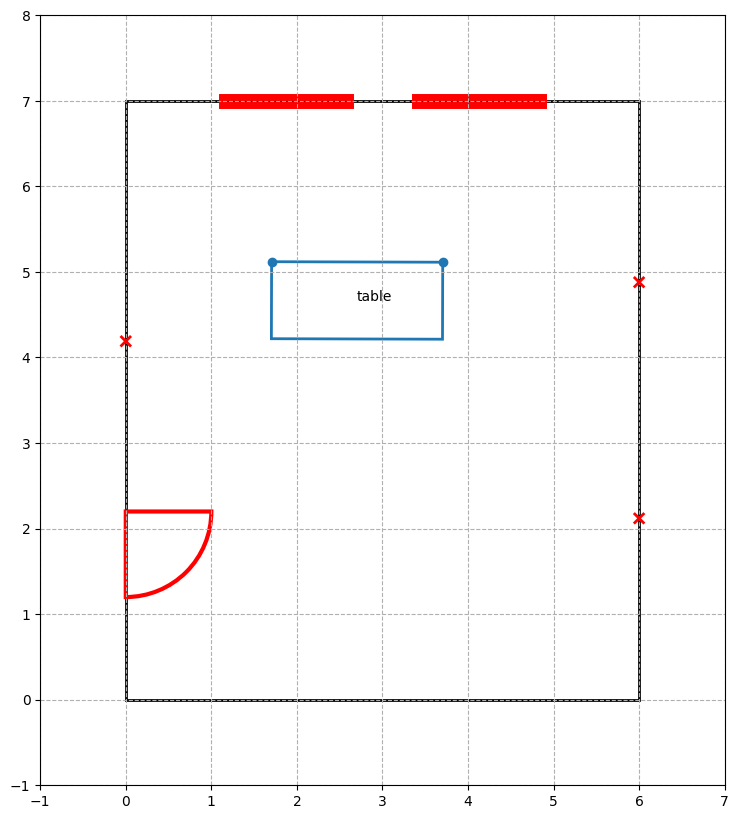

0.0008874204810539403


In [63]:
## Dining Room 

dining_room = create_room(6, 7)
create_fixed_object(dining_room, 'window', 1.5, 0.1, 'north', position = 0.25)
create_fixed_object(dining_room, 'window', 1.5, 0.1, 'north', position = 0.75)
create_fixed_object(dining_room, 'door', 1, 0.1, 'west', position = 0.2)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'west', position = 0.6)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'east', position = 0.3)
create_fixed_object(dining_room, 'socket', 0.1, 0.05, 'east', position = 0.7)

create_moving_object(dining_room, 'table', 2, 0.9, 'dining', 0)
# for i in range(6):
#     create_moving_object(dining_room, 'chair', 0.6, 0.5, 'dining', i + 1)

def optimize_primary_objects(positions, room): 
    
    output = 0
    output += ind_central(positions, room, 0, both = True) # dining table 
    #output += p_surround(positions, room, 0, [i + 1 for i in range(6)]) # chairs around dining table
    # for i in range(1,  7): 
    #     output += p_next_to(positions, room, i, 0, side1 = 'front')

    output += ind_aligned(positions, room)
    output += 5*ind_in_bounds(positions, room)
    output += 5*ind_no_overlap(positions, room)

    return output

bounds = Bounds([0] * 3 * len(dining_room.moving_objects), [dining_room.width, dining_room.length, 2*np.pi] * len(dining_room.moving_objects))
options = {'maxiter': 400, 'ftol': 1e-6}


max_iters = 30
min_fun = np.Inf
iters = 0
while min_fun > 1e-2:
    positions = np.zeros(3*len(dining_room.moving_objects))
    for i in range(len(dining_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, dining_room.width)
        positions[3*i + 1] = np.random.uniform(0, dining_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (dining_room), method = 'SLSQP', options = options)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 

    if iters % 10 == 0: 
        print(iters, best_res.fun)

    iters += 1

print(iters, res.fun, res.message)
    
for i in range(len(dining_room.moving_objects)): 
    dining_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

dining_room.draw() 
print(best_res.fun)

No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
No region with this name is in the room.
Region not found.
0 3.4317169046715343
10 0.4291742580442152
Max number of iterations reached.
15 2.694138237634026 Optimization terminated successfully


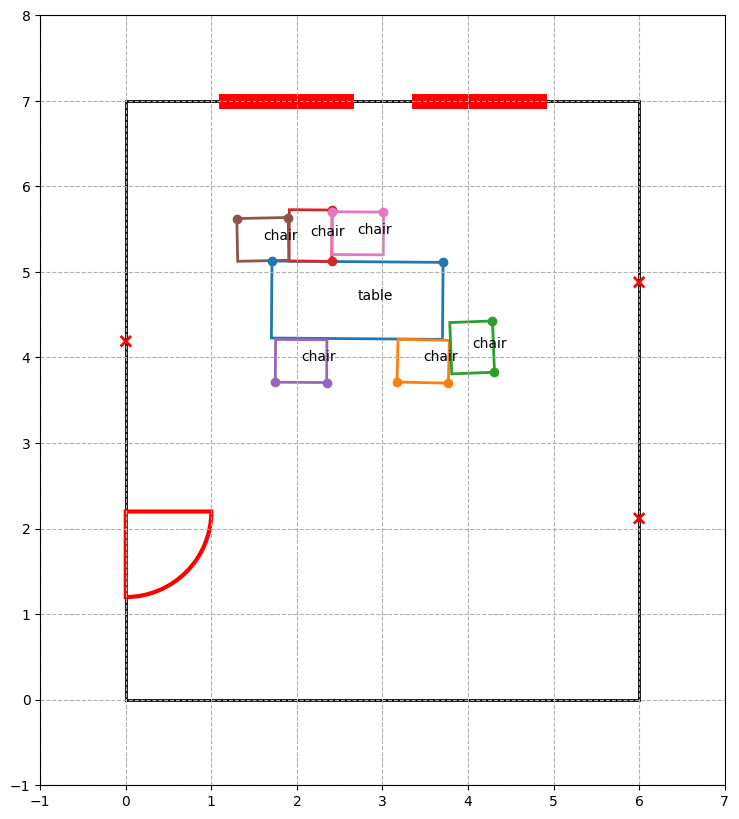

0.4291742580442152


In [64]:
for i in range(6):
    create_moving_object(dining_room, 'chair', 0.6, 0.5, 'dining', i + 1)

def optimize_primary_objects(positions, room): 

    output = 0
    # for i in range(1,  7): 
    #     output += p_next_to(positions, room, i, 0, side1 = 'front')

    output += p_surround(positions, room, 0, [i + 1 for i in range(6)]) # chairs around dining table

    output += 100*np.linalg.norm(positions[:3] - dining_room.moving_objects[0].position)**2
    output += 3*ind_aligned(positions, room)
    output += 5*ind_in_bounds(positions, room)
    output += 5*ind_no_overlap(positions, room)

    return output

bounds = Bounds([0] * 3 * len(dining_room.moving_objects), [dining_room.width, dining_room.length, 2*np.pi] * len(dining_room.moving_objects))
options = {'maxiter': 400, 'ftol': 1e-6}


max_iters = 15
min_fun = np.Inf
iters = 0
while min_fun > 1e-2:
    positions = np.zeros(3*len(dining_room.moving_objects)) 
    positions[:3] = dining_room.fixed_objects[-1].position
    for i in range(1, len(dining_room.moving_objects)): 
        positions[3*i] = np.random.uniform(0, dining_room.width)
        positions[3*i + 1] = np.random.uniform(0, dining_room.length)
        positions[3*i + 2] = np.random.uniform(0, 2*np.pi)

    res = minimize(optimize_primary_objects, positions, args = (dining_room), method = 'SLSQP', options = options)
    if res.fun < min_fun:
        min_fun = res.fun
        best_res = res
    if iters == max_iters: 
        print("Max number of iterations reached.")
        break 

    if iters % 10 == 0: 
        print(iters, best_res.fun)

    iters += 1

print(iters, res.fun, res.message)
    
for i in range(len(dining_room.moving_objects)): 
    dining_room.moving_objects[i].position = best_res.x[3*i:3*i + 3] 

dining_room.draw() 
print(best_res.fun)